#**🚀 제조 시계열 데이터 처리 기초 실습**

## **실습 목표:**

 - UCI AI4I 2020 예측 정비 데이터셋을 활용한 데이터 전처리

  - **데이터셋:** UCI Machine Learning Repository - AI4I 2020 Predictive Maintenance

 - 산업용 인공지능(AI4I) 2020 예지보전 데이터셋

 - 의미: '예지보전(Predictive Maintenance)'은 기계가 고장 나기 전에 데이터를 분석하여 미리 정비하는 기술.  이 데이터셋은 실제 공장 상황(밀링 머신)을 시뮬레이션하여 10,000개의 데이터 제공.

 - 결측치 처리, 노이즈 필터링, 상관관계 분석 실습

 - **도구:** pandas, numpy, seaborn, matplotlib, scipy

## Section 1: 라이브러리 임포트

In [1]:
# 데이터 처리 및 시각화에 필요한 핵심 라이브러리를 불러옵니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import medfilt

print("✅ 라이브러리 임포트 완료")


✅ 라이브러리 임포트 완료


## Section 2: 데이터 로드 및 구조 이해

**데이터셋 정보:**
 - AI4I 2020 Predictive Maintenance Dataset
 - 밀링 머신(Milling Machine)의 센서 데이터
 - 10,000개 행 × 14개 컬럼

 **주요 변수:**
 - Air temperature [K]: 공장 내부 온도
 - Process temperature [K]: 가공 시 발생하는 온도
 - Rotational speed [rpm]: 모터 회전 속도
 - Torque [Nm]: 모터가 가하는 힘
 - Tool wear [min]: 공구 마모 시간

## Section 3: 전처리 1 - 결측치 처리

 **문제 상황:**
 - 네트워크 지연, 센서 오류 등으로 데이터가 비거나 끊김

 **해결 전략:**
 1. **삭제(Drop)**: 데이터가 충분할 때 일부 행 제거
 2. **대치(Imputation)**: 평균값, forward fill, 보간법 사용

 **시계열 데이터 권장:** 추세 보존을 위해 ffill 또는 interpolate 사용

In [3]:
# UCI 저장소에서 직접 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
df = pd.read_csv(url)

print("=== 데이터 기본 정보 ===")
print(f"데이터 크기: {df.shape[0]} rows × {df.shape[1]} columns\n")

# 상위 5개 행 확인
print("=== Raw Data Head ===")
print(df.head())

# 데이터 타입 및 결측치 확인
print("\n=== Data Info ===")
print(df.info())

# 기술 통계량
print("\n=== Descriptive Statistics ===")
# 개수(count), 평균(mean), 표준편차(std), 최소(min), 4분위수(25%, 50%, 75%), 최대(max)
display(df.describe())


=== 데이터 기본 정보 ===
데이터 크기: 10000 rows × 14 columns

=== Raw Data Head ===
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF 

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [5]:
# 교육 목적으로 인위적인 결측치 생성
print("=== 결측치 생성 (교육용) ===")
df_practice = df.copy()
df_practice.loc[10:20, 'Air temperature [K]'] = np.nan
df_practice.loc[50:55, 'Process temperature [K]'] = np.nan

# 결측치 확인
print("\n결측치 개수:")
print(df_practice.isnull().sum())

# 방법 1: Forward Fill (이전 값으로 채우기)
df_filled = df_practice.fillna(method='ffill')

print("\n✅ Forward Fill 적용 후 결측치 개수:")
print(df_filled.isnull().sum())

# 방법 2: Linear Interpolation (선형 보간)
df_interpolated = df_practice.interpolate(method='linear')

print("\n✅ Linear Interpolation 적용 후 결측치 개수:")
print(df_interpolated.isnull().sum())

=== 결측치 생성 (교육용) ===

결측치 개수:
UDI                         0
Product ID                  0
Type                        0
Air temperature [K]        11
Process temperature [K]     6
Rotational speed [rpm]      0
Torque [Nm]                 0
Tool wear [min]             0
Machine failure             0
TWF                         0
HDF                         0
PWF                         0
OSF                         0
RNF                         0
dtype: int64

✅ Forward Fill 적용 후 결측치 개수:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

✅ Linear Interpolation 적용 후 결측치 개수:
UDI                        0
Product ID             

/tmp/ipython-input-1205740002.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_practice.fillna(method='ffill')
/tmp/ipython-input-1205740002.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_practice.interpolate(method='linear')


## Section 4: 전처리 2 - 노이즈 필터링 (Moving Average)

 **문제:**
 - 전기적 간섭, 진동 등으로 신호에 노이즈 발생

 **해결:**
 - **이동 평균(Moving Average)**: 최근 N개 데이터의 평균으로 부드럽게 만듦
 - window 크기: 5~10부터 시작하여 조정

 **주의:** 지나친 평활화는 중요한 신호 특징 손실 가능


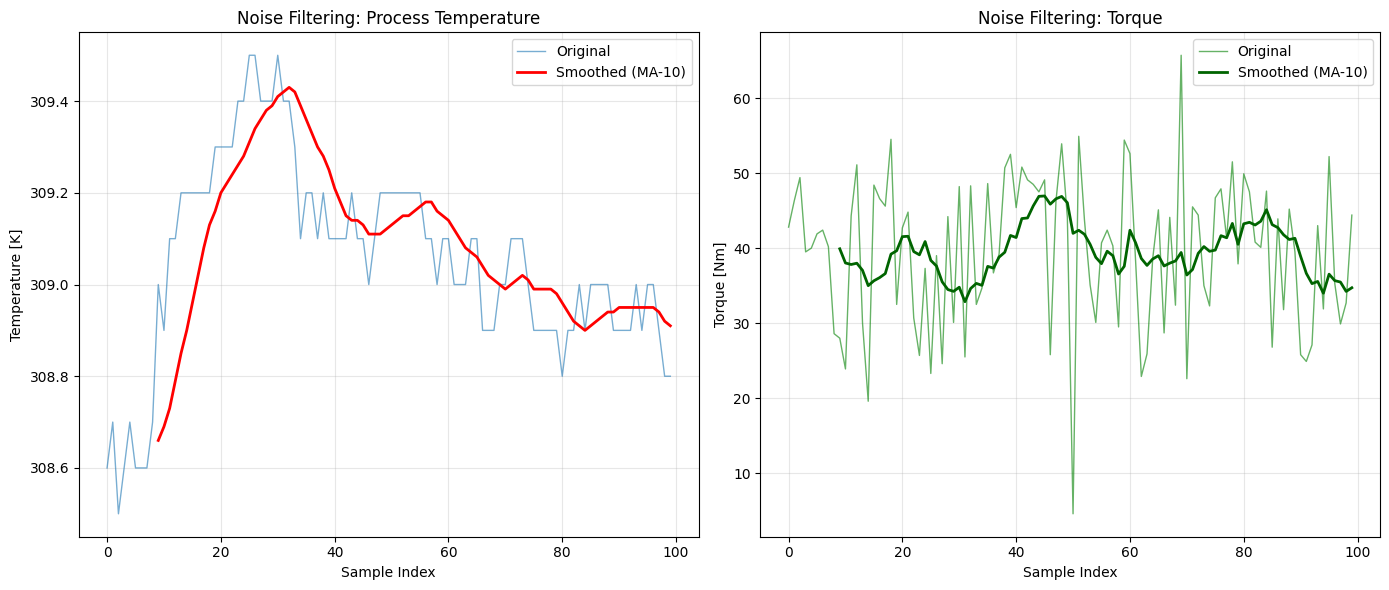

✅ 이동 평균 필터 적용 완료


In [7]:
# 이동 평균 적용 (Process Temperature)
window_size = 10
df_filled['Process_Temp_Smooth'] = df_filled['Process temperature [K]'].rolling(window=window_size).mean()

# 시각화: 원본 vs 평활화 비교
plt.figure(figsize=(14, 6))

# 샘플 100개만 표시 (전체는 너무 조밀)
sample_range = slice(0, 100)

plt.subplot(1, 2, 1)
plt.plot(df_filled['Process temperature [K]'].iloc[sample_range],
         label='Original', alpha=0.6, linewidth=1)
plt.plot(df_filled['Process_Temp_Smooth'].iloc[sample_range],
         label=f'Smoothed (MA-{window_size})', color='red', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Temperature [K]')
plt.title('Noise Filtering: Process Temperature')
plt.legend()
plt.grid(True, alpha=0.3)

# Torque에도 적용
df_filled['Torque_Smooth'] = df_filled['Torque [Nm]'].rolling(window=window_size).mean()

plt.subplot(1, 2, 2)
plt.plot(df_filled['Torque [Nm]'].iloc[sample_range],
         label='Original', alpha=0.6, linewidth=1, color='green')
plt.plot(df_filled['Torque_Smooth'].iloc[sample_range],
         label=f'Smoothed (MA-{window_size})', color='darkgreen', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Torque [Nm]')
plt.title('Noise Filtering: Torque')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 이동 평균 필터 적용 완료")

## Section 5: 전처리 3 - 이상치(Outlier) 제거

 **방법:** Z-Score 기반 이상치 탐지
 - Z-Score > 3 또는 < -3인 데이터를 이상치로 간주
 - 정규분포 가정 하에 99.7% 신뢰구간 밖의 값


In [8]:
# Z-Score 계산 함수
def remove_outliers_zscore(data, column, threshold=3):
    """
    Z-Score 방식으로 이상치 제거

    Parameters:
    - data: DataFrame
    - column: 이상치를 검사할 컬럼명
    - threshold: Z-Score 임계값 (기본 3)

    Returns:
    - 이상치가 제거된 DataFrame
    """
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std

    # 임계값 내의 데이터만 유지
    filtered_data = data[abs(z_scores) < threshold]

    removed_count = len(data) - len(filtered_data)
    print(f"🔍 {column}: {removed_count}개 이상치 제거 ({len(data)} → {len(filtered_data)})")

    return filtered_data

# 주요 센서 변수에 대해 이상치 제거
df_clean = df_filled.copy()

for col in ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    df_clean = remove_outliers_zscore(df_clean, col, threshold=3)

print(f"\n✅ 최종 데이터 크기: {df_clean.shape[0]} rows")

🔍 Air temperature [K]: 0개 이상치 제거 (10000 → 10000)
🔍 Process temperature [K]: 0개 이상치 제거 (10000 → 10000)
🔍 Rotational speed [rpm]: 164개 이상치 제거 (10000 → 9836)
🔍 Torque [Nm]: 21개 이상치 제거 (9836 → 9815)
🔍 Tool wear [min]: 0개 이상치 제거 (9815 → 9815)

✅ 최종 데이터 크기: 9815 rows


## Section 6: 상관관계 분석

 **목적:**
 - 변수 간의 선형 관계를 파악
 - 다중공선성(Multi-collinearity) 확인

 **물리적 상식 검증:**
 - RPM ↑ → Torque ↓ (회전 속도와 토크는 반비례)
 - Air Temp ↔ Process Temp (양의 상관관계 예상)

In [9]:
# 분석할 수치형 컬럼 선택
analysis_columns = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

# 상관계수 행렬 계산
correlation_matrix = df_clean[analysis_columns].corr()

print("=== 상관계수 행렬 (Correlation Matrix) ===")
print(correlation_matrix.round(3))

# 주요 상관관계 해석
print("\n=== 주요 발견 사항 ===")
print(f"RPM vs Torque: {correlation_matrix.loc['Rotational speed [rpm]', 'Torque [Nm]']:.3f}")
print("  → 음의 상관관계: 회전 속도가 증가하면 토크는 감소 (물리 법칙 부합)")

print(f"\nAir Temp vs Process Temp: {correlation_matrix.loc['Air temperature [K]', 'Process temperature [K]']:.3f}")
print("  → 강한 양의 상관관계: 공장 온도가 높으면 공정 온도도 상승")

=== 상관계수 행렬 (Correlation Matrix) ===
                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                    1.000                    0.876   
Process temperature [K]                0.876                    1.000   
Rotational speed [rpm]                 0.018                    0.017   
Torque [Nm]                           -0.010                   -0.012   
Tool wear [min]                        0.016                    0.016   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Air temperature [K]                       0.018       -0.010            0.016  
Process temperature [K]                   0.017       -0.012            0.016  
Rotational speed [rpm]                    1.000       -0.896            0.002  
Torque [Nm]                              -0.896        1.000           -0.003  
Tool wear [min]                           0.002       -0.003            1.000  

=== 주요 발견 사항 ===
RPM vs Torque: -0.896
  → 

## Section 7: 히트맵(Heatmap) 시각화

 **설정 요령:**
 - vmin=-1, vmax=1: 색상 스케일 고정
 - annot=True: 상관계수 값 표기
 - cmap='coolwarm': 파란색(음의 상관) ~ 빨간색(양의 상관)

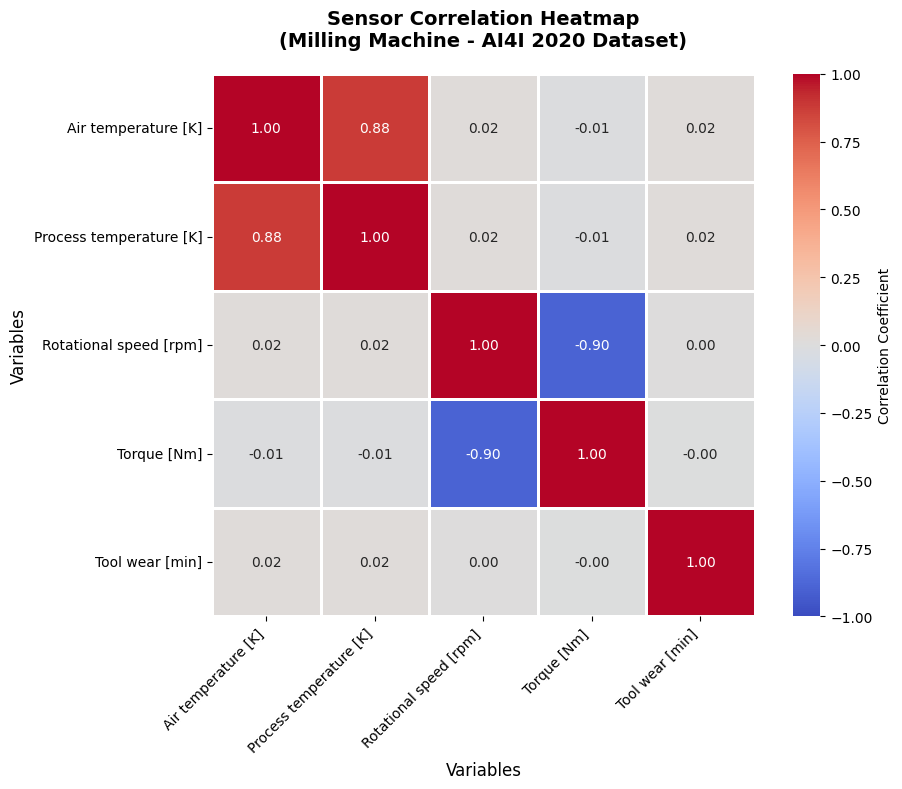

✅ 히트맵 시각화 완료


In [10]:
plt.figure(figsize=(10, 8))

# Seaborn 히트맵 생성
sns.heatmap(
    correlation_matrix,
    annot=True,           # 값 표기
    fmt='.2f',            # 소수점 2자리
    cmap='coolwarm',      # 색상 맵
    vmin=-1,              # 최소값 고정
    vmax=1,               # 최대값 고정
    center=0,             # 중심값
    square=True,          # 정사각형 셀
    linewidths=1,         # 그리드 선 두께
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Sensor Correlation Heatmap\n(Milling Machine - AI4I 2020 Dataset)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# 축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("✅ 히트맵 시각화 완료")